In [178]:
import os
from glob import glob
import h5py
import numpy as np
from matplotlib import pyplot as plt
px = 1 / plt.rcParams['figure.dpi']  # pixel in inches

rgb_imgs = sorted(glob("D:/dataset/hypersim/downloads/ai_001_001/ai_001_001/images/scene_cam_00_final_hdf5/*.color.hdf5"))
depth_imgs = sorted(glob("D:/dataset/hypersim/downloads/ai_001_001/ai_001_001/images/scene_cam_00_geometry_hdf5/*.depth_meters.hdf5"))
print(len(rgb_imgs), len(depth_imgs))

with h5py.File(rgb_imgs[50]) as f:
    img = np.array(f['dataset'], dtype=np.float32)
    print(img.shape)

with h5py.File(depth_imgs[50]) as f:
    depth = np.array(f['dataset'], dtype=np.float32)
    print(depth.shape)

98 98
(768, 1024, 3)
(768, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


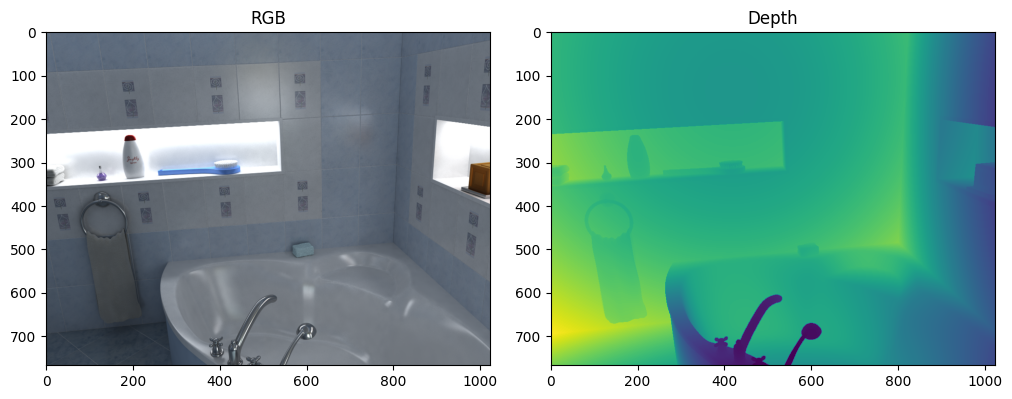

In [179]:
fig, ax = plt.subplots(figsize=(1024 * px, 768 * px), ncols=2)

data = [img, depth]
titles = ['RGB', 'Depth']
for i in range(2):
    ax[i].imshow(data[i])
    ax[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [203]:
num_depth_planes = 10

# Quantize depth
copy_depth = depth.copy()
copy_depth = copy_depth * 1000
# crop
depth_vals = copy_depth.ravel()
depth_bins = np.interp(np.linspace(0, len(depth_vals), num_depth_planes), np.arange(len(depth_vals)), np.sort(depth_vals)).round(decimals=2)

masks = []
for i in range(num_depth_planes):
    if i < num_depth_planes - 1:
        min_d = depth_bins[i]
        max_d = depth_bins[i + 1]
        mask = np.where(copy_depth >= min_d, 1, 0) * np.where(copy_depth < max_d, 1, 0)

    else:
        mask = np.where(copy_depth >= depth_bins[-1], 1, 0)
    
    masks.append(mask)
masks = np.stack(masks)
masks = np.where(masks > 0, 1, 0)
masks = np.flip(masks, axis=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


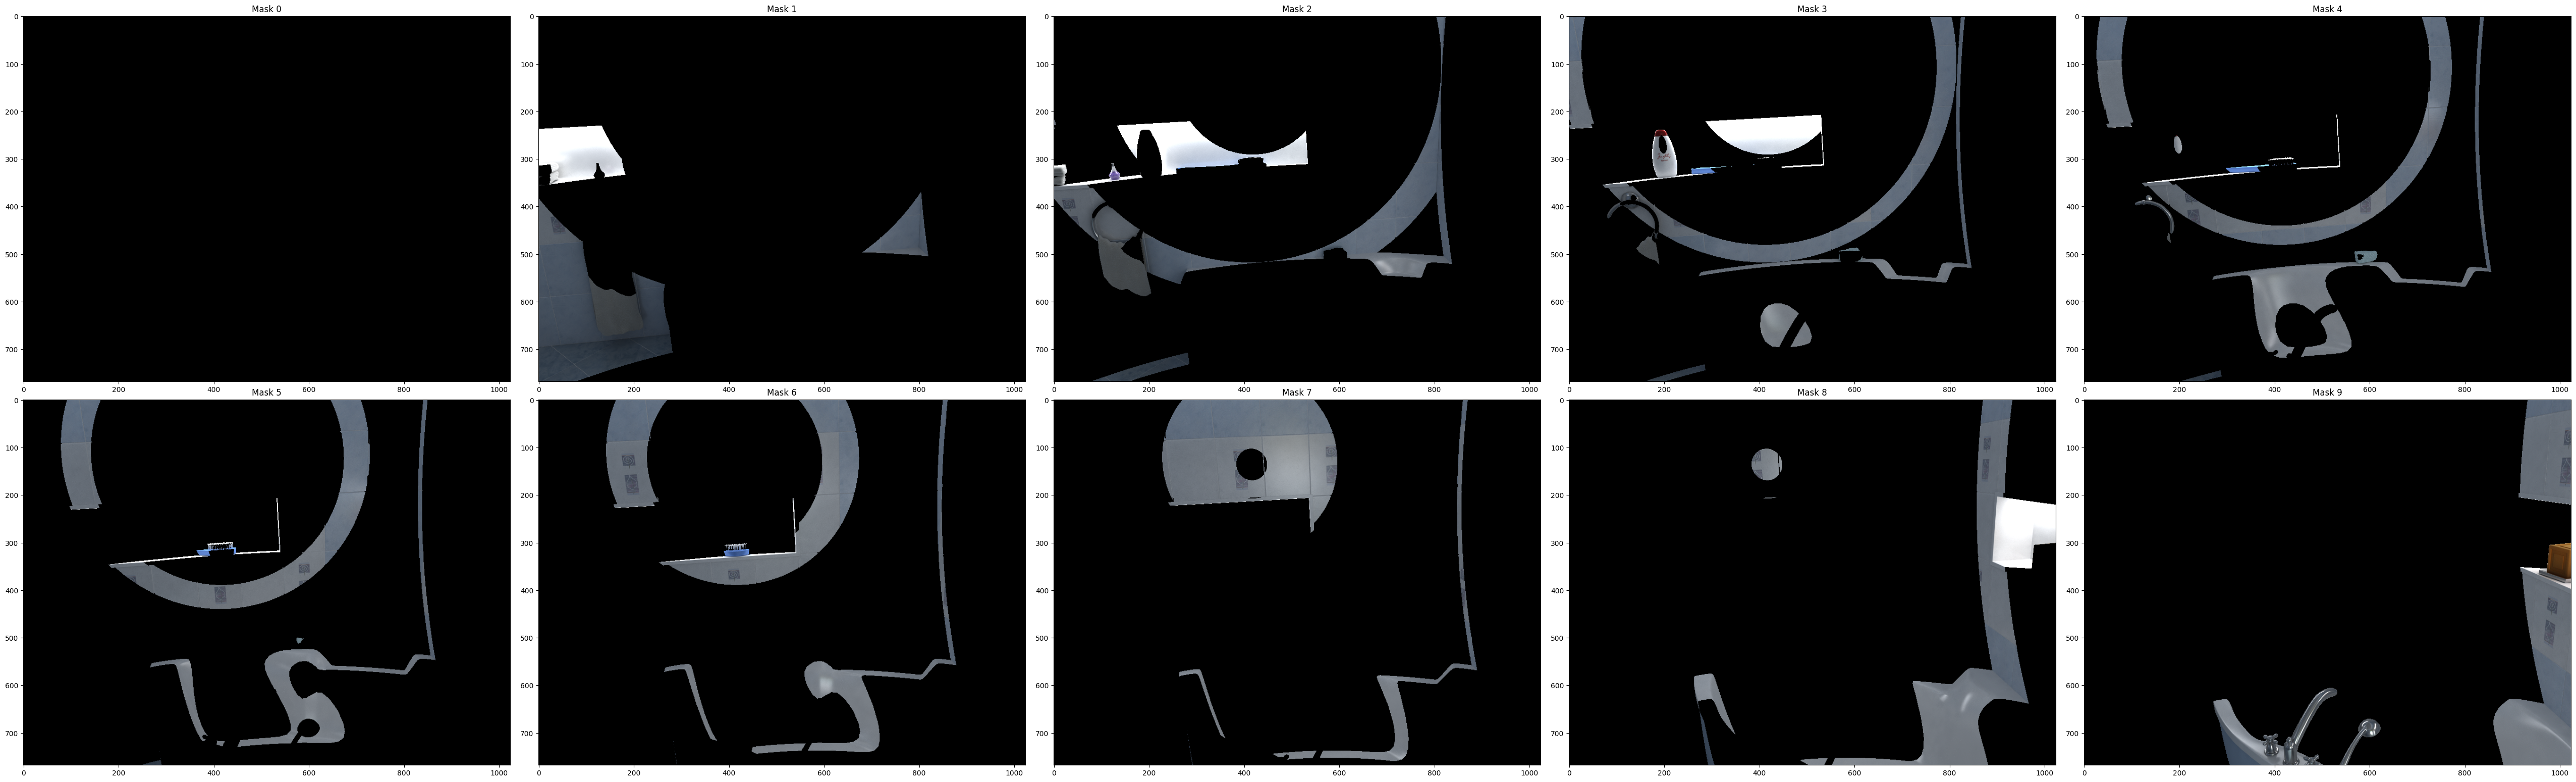

In [204]:
# Visualization
fig, ax = plt.subplots(figsize=(1024 * 5 * px, 768 * (num_depth_planes // 5) * px), ncols=5, nrows=num_depth_planes // 5)

for i in range(num_depth_planes):
    ax[i // 5][i % 5].imshow(img * np.repeat(np.expand_dims(masks[i], axis=-1), 3, axis=-1))
    ax[i // 5][i % 5].set_title(f"Mask {i}")

plt.tight_layout()
plt.show()